<a href="https://colab.research.google.com/github/alexeylazarev13/da_homeworks/blob/main/project_da_30_08_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
import numpy as np
import pandas as pd
import io
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import *
%matplotlib inline
plt.style.use('ggplot')
import json
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [208]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/csv/wiki_movie_plots_deduped.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [210]:
df.head(3)


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."


**Быстрый анализ датасета с помощью sweetviz:**

In [ ]:
!pip install sweetviz

In [211]:
import sweetviz as sv
my_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [212]:
my_report.show_html('SWEETVIZ_REPORT.html')

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
import IPython
IPython.display.HTML(filename='SWEETVIZ_REPORT.html')

**1. Подготовьте гистограммы по самым популярным жанрам, режиссерам, нац. принадлежностям фильмов, годам**

**1.1 Гистограмма по самым популярных жанрам:**

In [214]:
genre_counts = df["Genre"].value_counts().head(11)
genre_counts


unknown      6083
drama        5964
comedy       4379
horror       1167
action       1098
thriller      966
romance       923
western       865
crime         568
adventure     526
musical       467
Name: Genre, dtype: int64

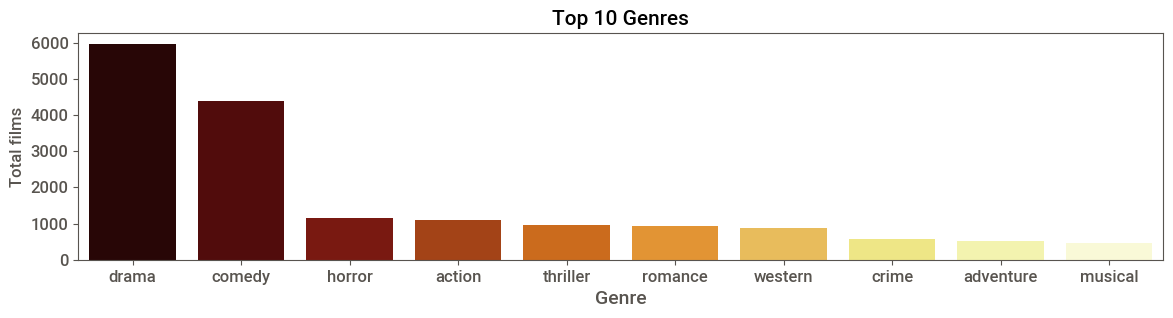

In [216]:
genre_counts = df["Genre"].value_counts().head(11)
genre_counts_without_unknown =  genre_counts[['drama', 'comedy', 'horror', 'action', 'thriller', 'romance', 'western', 'crime', 'adventure', 'musical']]
new_genre_counts_without_unknown = genre_counts_without_unknown.reset_index()
new_genre_counts_without_unknown.rename(columns={'index': 'genre', 'Genre': 'count'}, inplace=True)
plt.subplots(figsize=(14,3))
sns.barplot(y=new_genre_counts_without_unknown['count'],x=new_genre_counts_without_unknown['genre'],data=new_genre_counts_without_unknown,palette='afmhot')
plt.xticks(fontsize=12)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Genre',fontsize=14)
plt.ylabel('Total films',fontsize=12)
plt.title('Top 10 Genres',fontsize=15)
plt.show()

**1.2 Гистограмма по самым популярных режиссерам:**

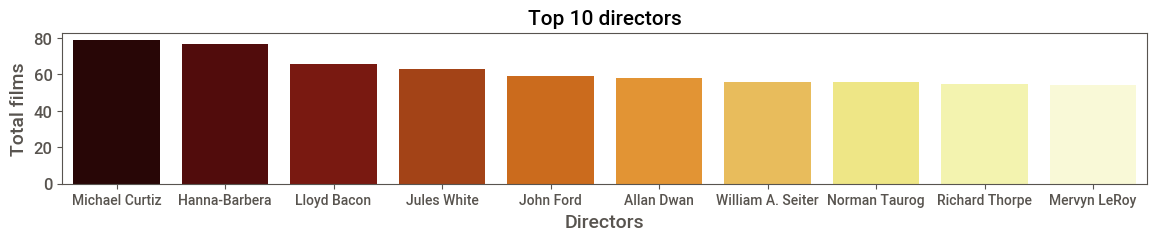

In [219]:
director_counts = df["Director"].value_counts().head(11)
director_counts_without_unknown =  director_counts[['Michael Curtiz', 'Hanna-Barbera', 'Lloyd Bacon', 'Jules White', 'John Ford', 'Allan Dwan', 'William A. Seiter', 'Norman Taurog', 'Richard Thorpe', 'Mervyn LeRoy']]
new_director_counts_without_unknown = director_counts_without_unknown.reset_index()
new_director_counts_without_unknown.rename(columns={'index': 'director', 'Director': 'count'}, inplace=True)
plt.subplots(figsize=(14,2))
sns.barplot(y=new_director_counts_without_unknown['count'],x=new_director_counts_without_unknown['director'],data=new_director_counts_without_unknown,palette='afmhot')
plt.xticks(fontsize=10)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Directors',fontsize=14)
plt.ylabel('Total films',fontsize=14)
plt.title('Top 10 directors',fontsize=15)
plt.show()


**1.3 Гистограмма по самым популярных нац. принадлежностям фильмов:**

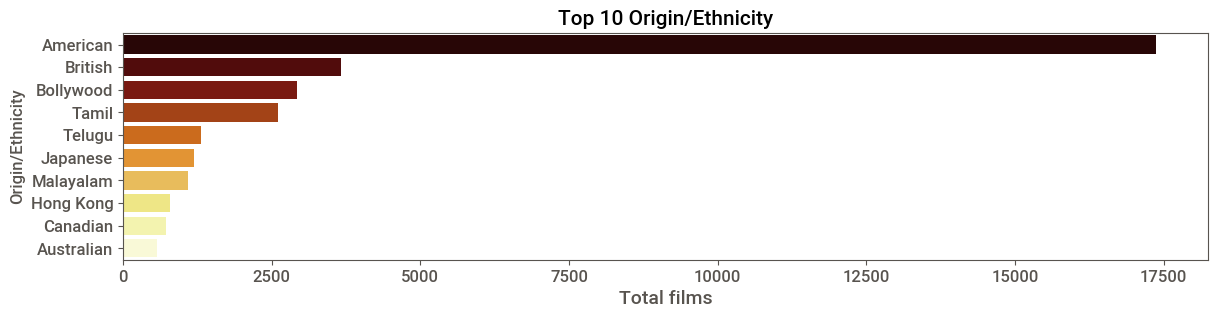

In [220]:
origin_counts = df["Origin/Ethnicity"].value_counts().head(10)
origin_counts =  origin_counts[['American', 'British', 'Bollywood', 'Tamil', 'Telugu', 'Japanese', 'Malayalam', 'Hong Kong', 'Canadian', 'Australian']]
origin_counts_wo_index = origin_counts.reset_index()
origin_counts_wo_index.rename(columns={'index': 'origin', 'Origin/Ethnicity': 'count'}, inplace=True)

plt.subplots(figsize=(14,3))
sns.barplot(y=origin_counts_wo_index['origin'],x=origin_counts_wo_index['count'],data=origin_counts_wo_index,palette='afmhot')
plt.xticks(fontsize=12)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Total films',fontsize=14)
plt.ylabel('Origin/Ethnicity',fontsize=12)
plt.title('Top 10 Origin/Ethnicity',fontsize=15)
plt.show()

**1.4 Гистограмма по самым популярным годам производства фильмов:**

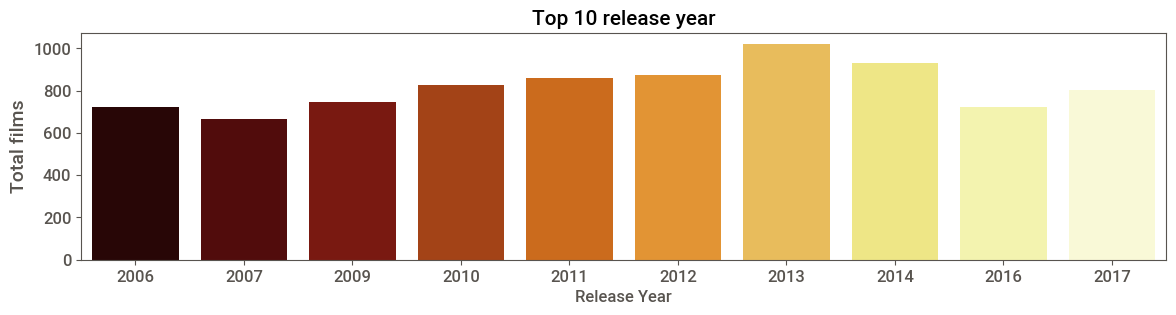

In [221]:
release_year_counts = df["Release Year"].value_counts().head(10)
release_year_counts_wo_index = release_year_counts.reset_index()
release_year_counts_wo_index.rename(columns={'index': 'release year', 'Release Year': 'count'}, inplace=True)
plt.subplots(figsize=(14,3))
sns.barplot(y=release_year_counts_wo_index['count'],x=release_year_counts_wo_index['release year'],data=release_year_counts_wo_index,palette='afmhot')
plt.xticks(fontsize=12)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Release Year',fontsize=12)
plt.ylabel('Total films',fontsize=14)
plt.title('Top 10 release year',fontsize=15)
plt.show()


**2. Sentiment analysis по отзывам (используя  nltk.classify) и оценка, как распределяется sentiment по актерам, режиссерам и жанрам**

In [222]:
df.head(3)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."


**Чистим данные:**

In [223]:
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

In [224]:
df_copy = df.copy()

In [225]:
df_copy.head(3)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."


**Перевод в нижний регистр:**

In [226]:
df_copy['Plot'] = df_copy['Plot'].str.lower()
df_copy.head(3)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"a bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"the moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"the film, just over a minute long, is composed..."


**Удаление знаков препинания:**

In [227]:
df_copy["Plot_replace"] = df_copy['Plot'].str.replace('[^\w\s]','')
#df = df.drop('column_name', axis=1)
df_copy.head(3)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,Plot_replace
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"a bartender is working at a saloon, serving dr...",a bartender is working at a saloon serving dri...
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"the moon, painted with a smiling face hangs ov...",the moon painted with a smiling face hangs ove...
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"the film, just over a minute long, is composed...",the film just over a minute long is composed o...


**Удаление стоп-слов:**

In [228]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [229]:
stopWords=set(stopwords.words('english'))
print(stopWords)

{'we', 'he', 'myself', 'until', 'down', 'under', 'or', 'over', 's', "needn't", 'into', "mightn't", 'about', 'me', 'when', 'be', 'if', 'aren', 'some', 'wouldn', 'himself', "wasn't", 'my', 'such', 'other', 'our', 'an', 'has', 'd', "won't", 'her', 'was', 'before', 'doing', 'out', 'again', "isn't", 'did', 'because', 'more', 'not', 'only', 'own', "haven't", 'most', "shan't", 'mightn', "hadn't", 'few', 'can', 'below', 'couldn', 'on', "doesn't", 'here', 'i', 're', 've', 'should', 'ourselves', "didn't", "weren't", "you're", 'in', 'same', 'hers', "it's", 'any', 'they', 'are', 'herself', 'yourselves', "you'll", 'o', 'than', 'having', 'very', 't', 'your', 'through', 'nor', 'isn', 'but', 'doesn', 'mustn', 'yourself', 'theirs', 'off', "you'd", "hasn't", 'its', 'ours', 'itself', 'while', 'that', 'from', 'there', 'ain', 'didn', "you've", 'this', 'don', 'by', 'each', 'shan', 'she', 'yours', 'their', 'how', "should've", 'a', 'whom', 'after', "couldn't", 'those', 'during', 'been', 'now', "wouldn't", 'we

In [ ]:
!pip install texthero

In [ ]:
!pip install -U spacy

In [230]:
import texthero as hero

In [231]:
df_copy["Plot_replace_without_stopwords"] = hero.remove_stopwords(df_copy['Plot_replace'])
df_copy['Plot_replace_without_stopwords'].head(3)

0     bartender  working   saloon serving drinks  c...
1     moon painted   smiling face hangs   park  nig...
2     film    minute long  composed  two shots   fi...
Name: Plot_replace_without_stopwords, dtype: object

**Оценка как распределяется sentiment по жанрам:**

In [232]:
data = df_copy[['Plot_replace_without_stopwords', 'Genre']]
data.head(3)

,Plot_replace_without_stopwords,Genre
0,bartender working saloon serving drinks c...,unknown
1,moon painted smiling face hangs park nig...,unknown
2,film minute long composed two shots fi...,unknown


**Попробуем Vader для анализа текста:**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [234]:
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [235]:
data['scores'] = data['Plot_replace_without_stopwords'].apply(lambda Plot_replace_without_stopwords: vader.polarity_scores(Plot_replace_without_stopwords))
data.head(3)

,Plot_replace_without_stopwords,Genre,scores
0,bartender working saloon serving drinks c...,unknown,"{'neg': 0.117, 'neu': 0.883, 'pos': 0.0, 'comp..."
1,moon painted smiling face hangs park nig...,unknown,"{'neg': 0.039, 'neu': 0.705, 'pos': 0.256, 'co..."
2,film minute long composed two shots fi...,unknown,"{'neg': 0.128, 'neu': 0.802, 'pos': 0.07, 'com..."


In [236]:
data['compound'] = data['scores'].apply(lambda score_dict: score_dict['compound'])
data.head(3)

,Plot_replace_without_stopwords,Genre,scores,compound
0,bartender working saloon serving drinks c...,unknown,"{'neg': 0.117, 'neu': 0.883, 'pos': 0.0, 'comp...",-0.7269
1,moon painted smiling face hangs park nig...,unknown,"{'neg': 0.039, 'neu': 0.705, 'pos': 0.256, 'co...",0.8934
2,film minute long composed two shots fi...,unknown,"{'neg': 0.128, 'neu': 0.802, 'pos': 0.07, 'com...",-0.4215


In [237]:
data['sentiment'] = data['compound'].apply(lambda c: 'pos' if c>=0 else 'neg')
data.head(3)

,Plot_replace_without_stopwords,Genre,scores,compound,sentiment
0,bartender working saloon serving drinks c...,unknown,"{'neg': 0.117, 'neu': 0.883, 'pos': 0.0, 'comp...",-0.7269,neg
1,moon painted smiling face hangs park nig...,unknown,"{'neg': 0.039, 'neu': 0.705, 'pos': 0.256, 'co...",0.8934,pos
2,film minute long composed two shots fi...,unknown,"{'neg': 0.128, 'neu': 0.802, 'pos': 0.07, 'com...",-0.4215,neg


In [ ]:
#from sklearn.metrics import accuracy_score
#потом можно будет сравнить результаты оценки разными способами

**Уберем те строки, где жанр неизвестен:**

In [238]:
data_copy = data[data['Genre'] != 'unknown']

In [239]:
data_copy_index = data_copy['Genre'].value_counts('sentiment').head(10)
data_copy_index

drama        0.207062
comedy       0.152033
horror       0.040517
action       0.038121
thriller     0.033538
romance      0.032045
western      0.030032
crime        0.019720
adventure    0.018262
musical      0.016214
Name: Genre, dtype: float64

In [240]:
data_copy_without_index = data_copy_index.reset_index()
data_copy_without_index.head(3)

,index,Genre
0,drama,0.207062
1,comedy,0.152033
2,horror,0.040517


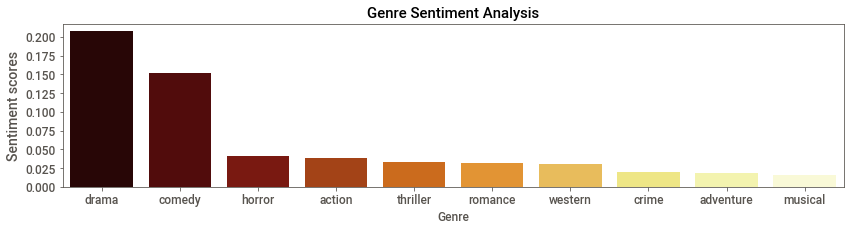

In [241]:
plt.subplots(figsize=(14,3))
sns.barplot(y=data_copy_without_index['Genre'],x=data_copy_without_index['index'],data=data_copy_without_index,palette='afmhot')
plt.xticks(fontsize=12)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Sentiment scores',fontsize=14)
plt.title('Genre Sentiment Analysis',fontsize=15)
plt.show()

**Теперь попробуем другим способом, с помощью nltk.classify (как и было в условии)**

In [ ]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews

In [242]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [243]:
def extract_features(word_list):
  return dict([(word, True) for word in word_list])

In [244]:
if __name__== '__main__':
  positive_fileids = movie_reviews.fileids('pos')
  negative_fileids = movie_reviews.fileids('neg')

In [245]:
features_positive = [(extract_features(movie_reviews.words(fileids=[f])), 
           'Positive') for f in positive_fileids]
features_negative = [(extract_features(movie_reviews.words(fileids=[f])), 
           'Negative') for f in negative_fileids]

In [246]:
threshold_factor = 0.8
threshold_positive = int(threshold_factor * len(features_positive))
threshold_negative = int(threshold_factor * len(features_negative))

In [247]:
features_train = features_positive[:threshold_positive] + features_negative[:threshold_negative]
features_test = features_positive[threshold_positive:] + features_negative[threshold_negative:]
print('\nNumber of training datapoints:', len(features_train))
print("Number of test datapoints:", len(features_test))


Number of training datapoints: 1600
Number of test datapoints: 400


In [249]:
classifier = NaiveBayesClassifier.train(features_train)
print("Accuracy of the classifier:", nltk.classify.util.accuracy(classifier, features_test))

Accuracy of the classifier: 0.735


In [250]:
print("Top 10 most informative words:")
for item in classifier.most_informative_features()[:10]:
  print(item[0])

Top 10 most informative words:
outstanding
insulting
vulnerable
ludicrous
uninvolving
astounding
avoids
fascination
affecting
animators


In [251]:
input = data_copy.copy()

In [253]:
input_reviews = input['Plot_replace_without_stopwords', 'Genre']
input_reviews.head(3)

KeyError: ignored

In [ ]:
#print("\nPredictions:")
for review in input_reviews:
  #print("\nReview:", review)
  probdist = classifier.prob_classify(extract_features(review.split()))
  pred_sentiment = probdist.max()
  input_reviews['pred_sentiment'] = 
  #print(pred_sentiment)

In [ ]:
print("Predicted sentiment:", pred_sentiment)
print("Probability:", round(probdist.prob(pred_sentiment), 2))

Predicted sentiment: Positive
Probability: 1.0
Predicted sentiment: Positive
Probability: 0.94
